## PoC Case study

Created: 19 December 2023<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
df = pd.read_excel(interim_dir+'final_universe_wtest_track_071123.xlsx', index_col = [0] )


In [4]:
df.final_centroid.nunique()

90

In [5]:
df

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,...,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks,CDR2019_NATIONAL_AGG_PV,CDR2020_STATUS,HLC,WS_pred_mol/L,WS_pred_mg/L,test_track
0,DTXSID6071908,DSSTox_High,N-Ethyl-N-((pentadecafluoroheptyl)sulphonyl)gl...,68957-63-1,Single Compound,CCN(CC(O)=O)S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)...,"InChI=1S/C11H8F15NO4S/c1-2-27(3-4(28)29)32(30,...",IOQHTIQMCISFKB-UHFFFAOYSA-N,C11H8F15NO4S,535.22,...,NaN,NaN,NaN,NaN,NaN,NaN,6.918310e-04,1.479108e-05,7.913133,A
1,DTXSID8071358,DSSTox_High,N-Methyl-perfluoro-1-heptanesulfonamide,68259-14-3,Single Compound,CNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)...,"InChI=1S/C8H4F15NO2S/c1-24-27(25,26)8(22,23)6(...",KDHCALLFPWZTPN-UHFFFAOYSA-N,C8H4F15NO2S,463.16,...,NaN,NaN,NaN,NaN,NaN,NaN,6.606934e-04,1.230269e-07,0.056958,A
2,DTXSID1071907,DSSTox_High,N-Ethylpentadecafluoro-1-heptanesulfonamide,68957-62-0,Single Compound,CCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,"InChI=1S/C9H6F15NO2S/c1-2-25-28(26,27)9(23,24)...",WMOMXEHEPXLIAV-UHFFFAOYSA-N,C9H6F15NO2S,477.19,...,DTXSID6027426,DTXSID1071907,0.6,0.0,NaN,NaN,6.760830e-04,4.466836e-08,0.021306,A
3,DTXSID001026645,DSSTox_Low,"1,1,2,2,3,3,4,4,5,5,6,6,7,7,7-Pentadecafluoro-...",167398-54-1,Single Compound,OCCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,"InChI=1S/C9H6F15NO3S/c10-3(11,4(12,13)6(16,17)...",LJJUSVBJKZXMCP-UHFFFAOYSA-N,C9H6F15NO3S,493.19,...,NaN,NaN,NaN,NaN,NaN,NaN,6.165950e-11,1.445440e-05,7.125771,A
4,DTXSID301026644,DSSTox_Low,(Perfluoroheptyl)(sulfonylamino)acetic acid,1003194-00-0,Single Compound,OC(=O)CNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,"InChI=1S/C9H4F15NO4S/c10-3(11,4(12,13)6(16,17)...",LAAXCIZXZCKWFF-UHFFFAOYSA-N,C9H4F15NO4S,507.17,...,NaN,NaN,NaN,NaN,NaN,NaN,5.011872e-11,4.897788e-05,24.829932,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,FDWNJOAJRRFFMD-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=S(=O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)F)[O-]...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.456542e-05,4.073803e-03,1352.325300,B
15410,GJQJKNOGONJTMT-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=C(C(F)(F)C(F)(F)C(F)F)[O-].[Ag+],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.786301e-06,1.023293e-01,20056.122958,B
15411,KTMCAOSDNBNPRO-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=S(=O)(C(F)(F)C(F)(F)C(F)(F)C(F)F)[O-].[K+],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.630781e-05,1.096478e-02,3091.626530,B
15412,UNHXQRJGZMXRPR-UHFFFAOYSA-M,NaN,NaN,NaN,NaN,O=S(=O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.495409e-04,2.454709e-03,937.584180,B


In [6]:
import sys

In [7]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [8]:
from model_functions import *

In [9]:
tsne_df = df[['dtxsid','Substance_Name', 'smiles','TSCA_STATUS', 'chain_length', 'test_track','MolWeight', 'BP_pred', 'LogVP_pred','MP_pred', 'LogP_pred', 'HLC', 'WS_pred_mol/L', 'WS_pred_mg/L', 'final_centroid', 'final_dist', 'group', 'group_str',
       'MaxMin_picks', 'tsca_centroid', 'tsca_centroid_id',
       'tsca_centroid_id2', 'tsca_analogues', 'tsca_dist', 'MaxMin_tsca_picks',
       'tsca_active_centroid', 'tsca_active_centroid_id',
       'tsca_active_centroid_id2', 'tsca_active_analogues', 'tsca_active_dist',
       'MaxMin_tsca_active_picks']].copy()

In [10]:
[e for e in tsne_df.columns.tolist() if 'tsca' in e]

['tsca_centroid',
 'tsca_centroid_id',
 'tsca_centroid_id2',
 'tsca_analogues',
 'tsca_dist',
 'MaxMin_tsca_picks',
 'tsca_active_centroid',
 'tsca_active_centroid_id',
 'tsca_active_centroid_id2',
 'tsca_active_analogues',
 'tsca_active_dist',
 'MaxMin_tsca_active_picks']

In [11]:
tsne_df['final_centroid_tag'] = tsne_df['dtxsid'].apply(lambda x: 1 if x in tsne_df.final_centroid.unique() else np.nan)

In [12]:
tsne_df1 = tsne_df.set_index('dtxsid')

In [13]:

tsne_df1['MaxMin_picks'] = tsne_df1['MaxMin_picks'].replace(0,np.nan)
tsne_df1['MaxMin_tsca_picks'] = tsne_df1['MaxMin_tsca_picks'].replace(0,np.nan)
tsne_df1['tsca_centroid_tag'] = tsne_df1['tsca_centroid'].replace('centroid',1)
tsne_df1['tsca_centroid_tag'] = tsne_df1['tsca_centroid_tag'].replace(1, "tsca_centroid")
tsne_df1['final_centroid_tag'] = tsne_df1['final_centroid_tag'].replace(1,'centroid')
tsne_df1['MaxMin_tsca_picks'] = tsne_df1['MaxMin_tsca_picks'].replace(1,"tsca_maxmin")
tsne_df1['MaxMin_picks'] = tsne_df1['MaxMin_picks'].replace(1,"maxmin")





In [14]:
tsne_df1['MaxMin_tsca_active_picks'] = tsne_df1['MaxMin_tsca_active_picks'].replace(0,np.nan)
tsne_df1['tsca_active_centroid_tag'] = tsne_df1['tsca_active_centroid'].replace('centroid',1)
tsne_df1['tsca_active_centroid_tag'] = tsne_df1['tsca_active_centroid_tag'].replace(1, "tsca_active_centroid")

In [15]:
tsne_df1['MaxMin_tsca_active_picks'] = tsne_df1['MaxMin_tsca_active_picks'].replace(1, "tsca_active_maxmin")

In [16]:
tsne_df1[['MaxMin_tsca_active_picks','tsca_active_centroid_tag']].sort_values(by = 'MaxMin_tsca_active_picks')

,MaxMin_tsca_active_picks,tsca_active_centroid_tag
dtxsid,,
DTXSID1067629,tsca_active_maxmin,NaN
DTXSID60862823,tsca_active_maxmin,tsca_active_centroid
DTXSID3044596,tsca_active_maxmin,NaN
DTXSID30889183,tsca_active_maxmin,NaN
DTXSID7067328,tsca_active_maxmin,tsca_active_centroid
...,...,...
FDWNJOAJRRFFMD-UHFFFAOYSA-M,NaN,NaN
GJQJKNOGONJTMT-UHFFFAOYSA-M,NaN,NaN
KTMCAOSDNBNPRO-UHFFFAOYSA-M,NaN,NaN


In [17]:
universe_dict = {}
for i,group in tsne_df1.groupby('group_str'):
    universe_dict[i] = group

In [18]:
[e for e in df.columns if 'test' in e]

['test_track']

In [19]:
phys_dict = {}
for i, group in tsne_df1.groupby('group_str'):
    phys_dict[i] = group[['LogP_pred', 'MP_pred', 'BP_pred','LogVP_pred', 
      'HLC',  'WS_pred_mg/L', 'test_track']]

In [20]:
results = {}
for i, group in tsne_df.groupby('group_str'):
    try:
        a = mk_fp(group)
    except Exception as error:
        print(error)
    else:
        results[i] = a

[13:32:34] WARNING: not removing hydrogen atom without neighbors


In [21]:
import umap

In [22]:
import random

In [149]:
def umap_plots(a, label = None):
    summary = {}
    summary['label'] = label
    model = umap.UMAP(random_state=42, n_jobs = 1)
    #model = TSNE(learning_rate = 200, perplexity=a[label].shape[0]-1, random_state = 42)
    umap_features = model.fit_transform(a[label])
    umap_features = pd.DataFrame(umap_features, index = a[label].index, columns = ['umap_x', 'umap_y'])
    #umap_df = pd.concat([umap_features, b[label]], axis = 1)
    summary['umap'] = umap_features
    return summary

In [24]:
#from sklearn.manifold import TSNE

In [26]:
def tsne_plots(a,b, label = None):
    summary = {}
    summary['label'] = label
    model = TSNE(learning_rate = 200, perplexity=a[label].shape[0]-1, random_state = 42)
    tsne_features = model.fit_transform(a[label])
    tsne_features = pd.DataFrame(tsne_features, index = a[label].index, columns = ['tsne_x', 'tsne_y'])
    tsne_df = pd.concat([tsne_features, b[label]], axis = 1)
    summary['tsne'] = tsne_df
    return summary

In [150]:
umap_lst = []
for k,v in results.items():
    try:
        umap_lst.append(umap_plots(results,  label = k))
    except Exception as error:
        print(k)


/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the d

('Unable to open ring(s)', 'lt7', nan, nan)


/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/home/grace/anaconda3/envs/py39/lib/python3.9/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [157]:
mylst = []
for i in range(len(umap_lst)):
    mylst.append(umap_lst[i]['label'])

In [158]:
umap_phys = {}
for i in range(len(umap_lst)):
    for e in mylst:
        if umap_lst[i]['label'] == e:
            a = pd.concat([umap_lst[i]['umap'], phys_dict[e]], axis = 1)
            umap_phys[e] = a

In [161]:
#umap_phys["('FASA based PFAA precursors', 'gte7', nan, nan)"]

In [168]:
universe_dict["('FASA based PFAA precursors', 'gte7', nan, nan)"]

,Substance_Name,smiles,TSCA_STATUS,chain_length,test_track,MolWeight,BP_pred,LogVP_pred,MP_pred,LogP_pred,...,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks,final_centroid_tag,tsca_centroid_tag,tsca_active_centroid_tag
dtxsid,,,,,,,,,,,,,,,,,,,,,
DTXSID6071908,N-Ethyl-N-((pentadecafluoroheptyl)sulphonyl)gl...,CCN(CC(O)=O)S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)...,inactive,7,A,534.993452,115.0,-4.60,96.0,4.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,centroid,NaN,NaN
DTXSID8071358,N-Methyl-perfluoro-1-heptanesulfonamide,CNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)...,inactive,7,A,462.972323,276.0,-4.10,136.0,4.10,...,tsca_maxmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTXSID1071907,N-Ethylpentadecafluoro-1-heptanesulfonamide,CCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,active,7,A,476.987973,264.0,-4.35,92.0,4.20,...,NaN,NaN,NaN,DTXSID6027426,DTXSID1071907,0.6,NaN,NaN,NaN,NaN
DTXSID001026645,"1,1,2,2,3,3,4,4,5,5,6,6,7,7,7-Pentadecafluoro-...",OCCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,unclassified,7,A,492.982887,300.0,-3.43,113.0,4.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTXSID301026644,(Perfluoroheptyl)(sulfonylamino)acetic acid,OC(=O)CNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,unclassified,7,A,506.962152,291.0,-3.92,147.0,4.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UUZCNLZINSJLSR-UHFFFAOYSA-N,NaN,CCCCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,unclassified,8,A,555.016079,201.0,-5.01,105.0,4.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WIUXGCKDKOYUAL-UHFFFAOYSA-N,NaN,CCCCN(CCO)S(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,unclassified,7,A,549.045488,195.0,-4.62,82.0,4.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WMOMXEHEPXLIAV-UHFFFAOYSA-N,NaN,CCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,unclassified,7,A,476.987973,264.0,-4.35,92.0,4.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
umap_all = {}
for i in range(len(umap_lst)):
    for e in mylst:
        if umap_lst[i]['label'] == e:
            a = pd.concat([umap_lst[i]['umap'], universe_dict[e]], axis = 1)
            umap_all[e] = a

In [174]:
#umap_all["('FASA based PFAA precursors', 'gte7', nan, nan)"]

In [92]:
#test = tsne_all[0]['tsne'].reset_index()

In [93]:
#[e for e in test.columns if 'tag' in e]

In [176]:
umap_all_dict = {}
for k,v in umap_all.items():
    a = umap_all[k].reset_index()
    b = pd.melt(a, id_vars = ['index', 'umap_x', 'umap_y'], value_vars = ['final_centroid_tag', 'tsca_active_centroid_tag', 'MaxMin_tsca_active_picks','MaxMin_tsca_picks','tsca_centroid_tag', 'MaxMin_picks',  ])
    b = b.dropna(subset=['value']).drop_duplicates(subset = 'index', keep = 'first')
    umap_all_dict[k] = a,b

In [180]:
#umap_all_dict["('FASA based PFAA precursors', 'gte7', nan, nan)"][0]

In [97]:
#umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][0]

In [181]:
color_dict2 = dict({'centroid':'green',
                  'maxmin':'yellow',
                  'tsca_maxmin': 'orange',
                   'tsca_centroid': 'red',
                   'tsca_active_centroid': 'blue',
                   'tsca_active_maxmin': 'black'})

In [182]:
umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][0].head()

,index,umap_x,umap_y,Substance_Name,smiles,TSCA_STATUS,chain_length,test_track,MolWeight,BP_pred,...,MaxMin_tsca_picks,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks,final_centroid_tag,tsca_centroid_tag,tsca_active_centroid_tag
0,DTXSID5059828,12.961277,4.306705,1-Iodopentadecafluoroheptane,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,inactive,7,C,495.880521,138.0,...,tsca_maxmin,NaN,NaN,NaN,NaN,NaN,NaN,centroid,tsca_centroid,NaN
1,DTXSID70336429,11.340261,5.635203,Perfluorooctanal,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,unclassified,7,C,397.978788,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID0059829,-24.266645,12.229578,Perfluorooctanoyl fluoride,FC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,active,7,C,415.969366,115.0,...,NaN,NaN,NaN,DTXSID0060147,DTXSID0059829,0.633333,tsca_active_maxmin,NaN,NaN,NaN
3,DTXSID20561002,11.822807,5.725079,(Perfluorooctane)-1-carbaldehydle,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,unclassified,8,C,447.975594,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID601026643,-15.550823,4.826104,Perfluoroheptane sulfonamide,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,unclassified,7,A,448.956673,291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][0][['index',
 'umap_x',
 'umap_y',
    'final_centroid_tag', 
                                                          'TSCA_STATUS',
 'tsca_centroid',
 'MaxMin_tsca_picks',
    'MaxMin_tsca_active_picks','tsca_active_centroid_tag'                                                      
                                                         ]].head()

,index,umap_x,umap_y,final_centroid_tag,TSCA_STATUS,tsca_centroid,MaxMin_tsca_picks,MaxMin_tsca_active_picks,tsca_active_centroid_tag
0,DTXSID5059828,12.961277,4.306705,centroid,inactive,centroid,tsca_maxmin,NaN,NaN
1,DTXSID70336429,11.340261,5.635203,NaN,unclassified,NaN,NaN,NaN,NaN
2,DTXSID0059829,-24.266645,12.229578,NaN,active,NaN,NaN,tsca_active_maxmin,NaN
3,DTXSID20561002,11.822807,5.725079,NaN,unclassified,NaN,NaN,NaN,NaN
4,DTXSID601026643,-15.550823,4.826104,NaN,unclassified,NaN,NaN,NaN,NaN


In [184]:
umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][0].shape

(57, 36)

[<matplotlib.collections.PathCollection object at 0x7f3c523c6400>, <matplotlib.collections.PathCollection object at 0x7f3c523c6d90>, <matplotlib.collections.PathCollection object at 0x7f3c523c6b50>, <matplotlib.collections.PathCollection object at 0x7f3c5289b730>, <matplotlib.collections.PathCollection object at 0x7f3c53c99eb0>] ['centroid', 'tsca_active_centroid', 'tsca_active_maxmin', 'tsca_maxmin', 'maxmin']


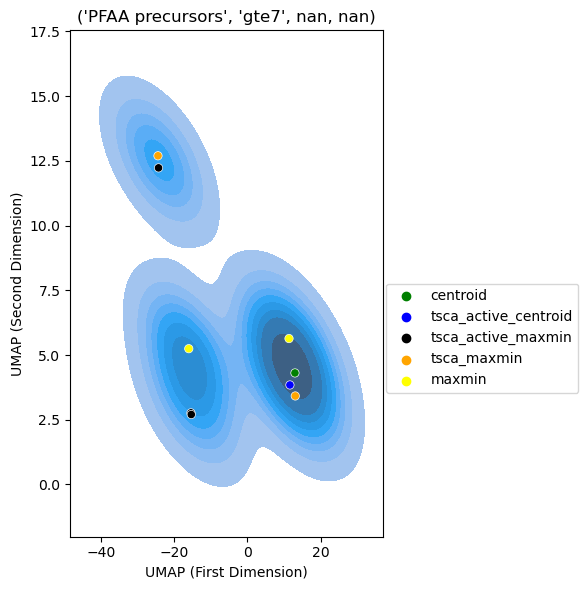

In [185]:
f, ax1 = plt.subplots(figsize = (6,6))
plt.subplots_adjust(hspace = 0.8)
colors = {1:'red', 0 : 'blue'}

ax1.title.set_text("('PFAA precursors', 'gte7', nan, nan)")
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax1 = sns.kdeplot(x="umap_x", y="umap_y", fill = True, data=umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][0], ax = ax1,  )
ax1 = sns.scatterplot(x="umap_x", y="umap_y",  hue = 'value',  color=[0.75,0.5,0], data=umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][1], ax = ax1,palette = color_dict2)
handles, labels = ax1.get_legend_handles_labels()
print(handles, labels)
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.01, 0.5), loc=2, borderaxespad=0.)
ax1.set_xlabel('UMAP (First Dimension)')
ax1.set_ylabel('UMAP (Second Dimension)')
plt.tight_layout()
f.savefig(figures_dir+'Figure15_case_study_211223.png', dpi = 300)

In [187]:
import pickle
pickle.dump( umap_all_dict, open(interim_dir+ "umap_all_dict_211223.pkl", "wb" ) )
pickle.dump( umap_phys, open(interim_dir+ "umap_lst_physchem_211223.pkl", "wb" ) )
pickle.dump( umap_all, open(interim_dir+ "umap_all_universe_211223.pkl", "wb" ) )

In [46]:
import pickle
pickle.dump( tsne_all_dict, open(interim_dir+ "tsne_all_dict_091123.pkl", "wb" ) )
pickle.dump( tsne_lst, open(interim_dir+ "tsne_lst_physchem_091123.pkl", "wb" ) )
pickle.dump( tsne_all, open(interim_dir+ "tsne_all_universe_091123.pkl", "wb" ) )

In [188]:
case_study = df[df['group_str'] == "('PFAA precursors', 'gte7', nan, nan)"][['dtxsid',
 'Substance_Name',
 'smiles','TSCA_STATUS',
 'chain_length',
 'subcategory',
 'category',
 'final_centroid',
 'final_dist','MaxMin_picks',
 'tsca_centroid',
 'tsca_centroid_id',
 'tsca_centroid_id2',
 'tsca_analogues',
 'tsca_dist',
 'MaxMin_tsca_picks','test_track','tsca_active_centroid',
 'tsca_active_centroid_id',
 'tsca_active_centroid_id2',
 'tsca_active_analogues',
 'tsca_active_dist',
 'MaxMin_tsca_active_picks']]

In [105]:
case_study['test_track'].value_counts()

C    30
A    27
Name: test_track, dtype: int64

In [106]:
case_study.shape

(57, 23)

In [107]:
df[df['dtxsid'].isin(['DTXSID5059828','DTXSID0060147'])]

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,...,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks,CDR2019_NATIONAL_AGG_PV,CDR2020_STATUS,HLC,WS_pred_mol/L,WS_pred_mg/L,test_track
9496,DTXSID5059828,DSSTox_High,1-Iodopentadecafluoroheptane,335-58-0,Single Compound,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,"InChI=1S/C7F15I/c8-1(9,2(10,11)4(14,15)6(18,19...",AHUMDLIBMIYQMU-UHFFFAOYSA-N,C7F15I,495.958,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000479,6.760830e-08,0.033526,C
9510,DTXSID0060147,DSSTox_High,Perfluorooctyl iodide,507-63-1,Single Compound,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,"InChI=1S/C8F17I/c9-1(10,3(13,14)5(17,18)7(21,2...",KWXGJTSJUKTDQU-UHFFFAOYSA-N,C8F17I,545.965,...,DTXSID0060147,DTXSID0060147,0.0,1.0,"<1,000,000 lb",1.0,0.000575,2.089296e-08,0.011405,C


In [108]:
case_study.head()

,dtxsid,Substance_Name,smiles,TSCA_STATUS,chain_length,subcategory,category,final_centroid,final_dist,MaxMin_picks,...,tsca_analogues,tsca_dist,MaxMin_tsca_picks,test_track,tsca_active_centroid,tsca_active_centroid_id,tsca_active_centroid_id2,tsca_active_analogues,tsca_active_dist,MaxMin_tsca_active_picks
9496,DTXSID5059828,1-Iodopentadecafluoroheptane,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,inactive,7,gte7,PFAA precursors,DTXSID5059828,0.000000,1,...,DTXSID5059828,0.000000,1.0,C,NaN,NaN,NaN,NaN,NaN,NaN
9497,DTXSID70336429,Perfluorooctanal,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,unclassified,7,gte7,PFAA precursors,DTXSID5059828,0.620690,1,...,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN
9498,DTXSID0059829,Perfluorooctanoyl fluoride,FC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...,active,7,gte7,PFAA precursors,DTXSID5059828,0.633333,0,...,DTXSID0059829,0.633333,0.0,C,NaN,NaN,DTXSID0060147,DTXSID0059829,0.633333,1.0
9499,DTXSID20561002,(Perfluorooctane)-1-carbaldehydle,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,unclassified,8,gte7,PFAA precursors,DTXSID5059828,0.620690,0,...,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN
9500,DTXSID601026643,Perfluoroheptane sulfonamide,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,unclassified,7,gte7,PFAA precursors,DTXSID5059828,0.645161,0,...,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
umap_all.keys()

dict_keys(["('FASA based PFAA precursors', 'gte7', nan, nan)", "('FASA based PFAA precursors', 'lt7', nan, nan)", "('Fluorotelomer PFAA precursors', 'gte7', nan, nan)", "('Fluorotelomer PFAA precursors', 'lt7', 1.0, nan)", "('Fluorotelomer PFAA precursors', 'lt7', 2.0, 1.0)", "('Fluorotelomer PFAA precursors', 'lt7', 2.0, 2.0)", "('Fluorotelomer PFAA precursors', 'lt7', 2.0, 3.0)", "('Fluorotelomer PFAA precursors', 'lt7', 3.0, 1.0)", "('Fluorotelomer PFAA precursors', 'lt7', 3.0, 2.0)", "('Fluorotelomer PFAA precursors', 'lt7', 3.0, 3.0)", "('Non-PFAA perfluoroalkyls', 'gte7', nan, nan)", "('Non-PFAA perfluoroalkyls', 'lt7', 1.0, 1.0)", "('Non-PFAA perfluoroalkyls', 'lt7', 1.0, 2.0)", "('Non-PFAA perfluoroalkyls', 'lt7', 1.0, 3.0)", "('Non-PFAA perfluoroalkyls', 'lt7', 2.0, 1.0)", "('Non-PFAA perfluoroalkyls', 'lt7', 2.0, 2.0)", "('Non-PFAA perfluoroalkyls', 'lt7', 2.0, 3.0)", "('Other aliphatics', 'gte7', 1.0, nan)", "('Other aliphatics', 'gte7', 2.0, nan)", "('Other aliphatics', 'gt

In [119]:
#umap_all_dict["('PFAA precursors', 'gte7', nan, nan)"][0].head()

['C', 'D', 'B', 'A']


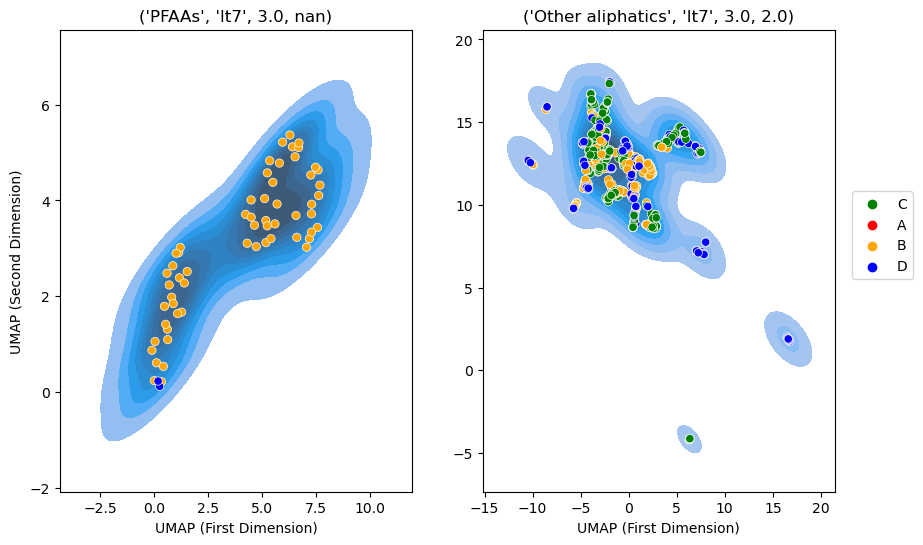

In [192]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,6))
plt.subplots_adjust(hspace = 0.8)
#colors = {1:'red', 0 : 'blue'}
color_dict = dict({'A':'blue',
                  'B':'orange',
                  'C': 'green',
                  'D': 'red'})
ax1.title.set_text("('PFAAs', 'lt7', 3.0, nan)")
ax2.title.set_text("('Other aliphatics', 'lt7', 3.0, 2.0)")
#grouped = tsne_df.groupby('Source')
#for key, group in grouped:
#    group.plot(ax=ax, kind='scatter', x='tsne_x', y='tsne_y', alpha = alphas[0], label=key, color=colors[key])
ax1 = sns.kdeplot(x="umap_x", y="umap_y", fill = True,
                     data=umap_all["('PFAAs', 'lt7', 3.0, nan)"], ax = ax1)
ax1 = sns.scatterplot(x="umap_x", y="umap_y", hue = 'test_track',palette = color_dict,
                     data=umap_all["('PFAAs', 'lt7', 3.0, nan)"], ax = ax1)

ax2 = sns.kdeplot(x="umap_x", y="umap_y", fill = True,
                     data=umap_all["('Other aliphatics', 'lt7', 3.0, 2.0)"], ax = ax2)
ax2 = sns.scatterplot(x="umap_x", y="umap_y", hue = 'test_track', palette = color_dict,
                     data=umap_all["('Other aliphatics', 'lt7', 3.0, 2.0)"], ax = ax2)
ax1.get_legend().remove()
ax2.set_ylabel('')
ax1.set_ylabel('UMAP (Second Dimension)')
ax1.set_xlabel('UMAP (First Dimension)')
ax2.set_xlabel('UMAP (First Dimension)')
handles, labels = ax2.get_legend_handles_labels()
print(labels)
legend_order = ['A', 'B', 'C', 'D']
labels = ['C', 'A', 'B', 'D']
l = plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05,0.65), loc=2, borderaxespad=0.)
fig.savefig(figures_dir+'Figure9_211223.png', dpi = 300, bbox_inches = 'tight')